In [ ]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Calculate the number of classes
classes = np.unique(y_train)

num_classes = len(classes)

classes

170498071/170498071 [==============================] - 11s 0us/step


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

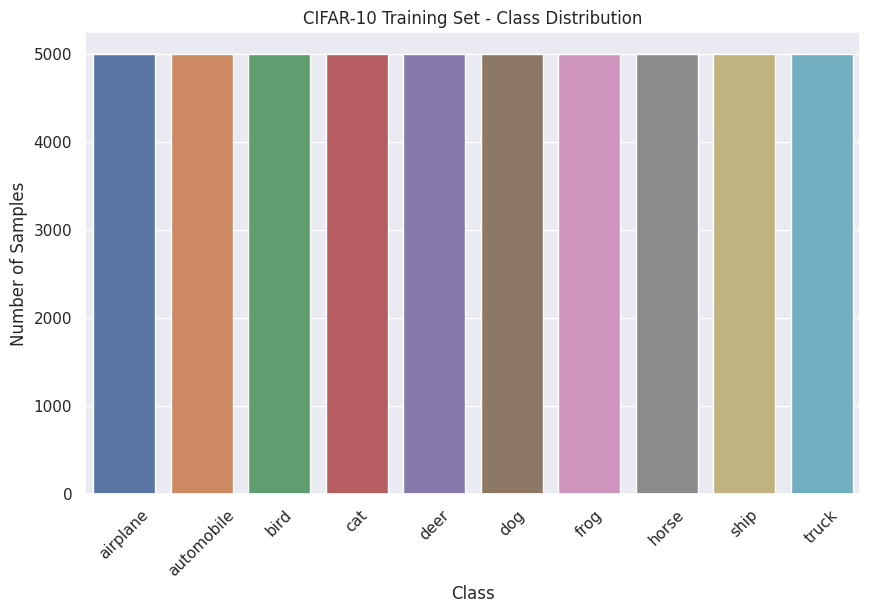

In [ ]:
train_counts = np.zeros(num_classes, dtype=int)
for label in y_train:
    train_counts[label[0]] += 1

train_counts

# Plotting the class distribution for the training set
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=class_names, y=train_counts)
plt.title("CIFAR-10 Training Set - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

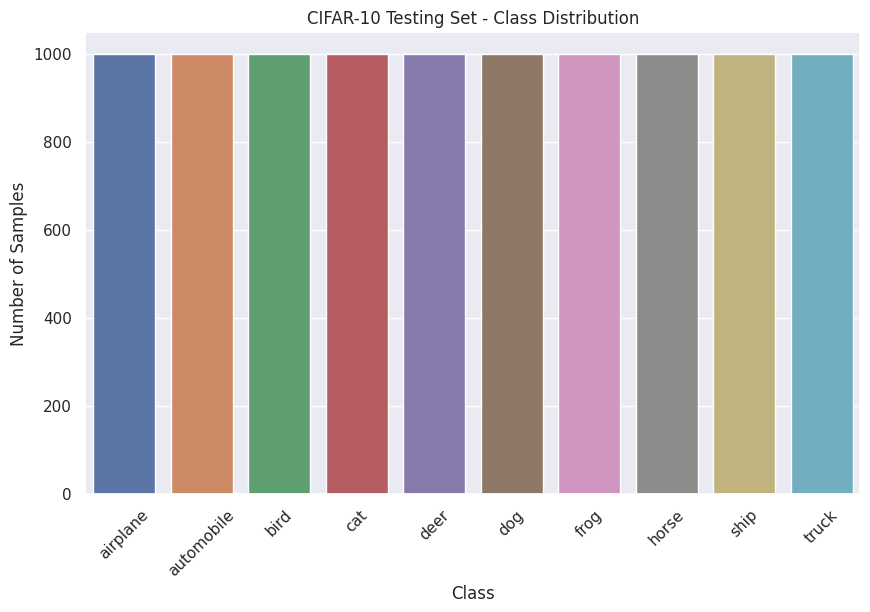

In [ ]:
test_counts = np.zeros(num_classes, dtype=int)
for label in y_test:
    test_counts[label[0]] += 1

# Plotting the class distribution for the training set
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=class_names, y=test_counts)
plt.title("CIFAR-10 Testing Set - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

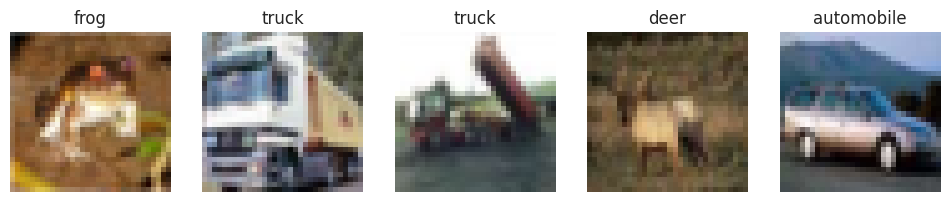

In [ ]:
# Display image samples
num_samples = 5

fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
for i in range(num_samples):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Flatten the input images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

In [ ]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(x_train_flattened, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test_flattened)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Compute accuracy and error
accuracy_logistic = accuracy_score(y_test, y_pred)
error_logistic = 1 - accuracy_logistic
print('Accuracy:', accuracy_logistic)
print('Error:', error_logistic)

Accuracy: 0.4063
Error: 0.5937


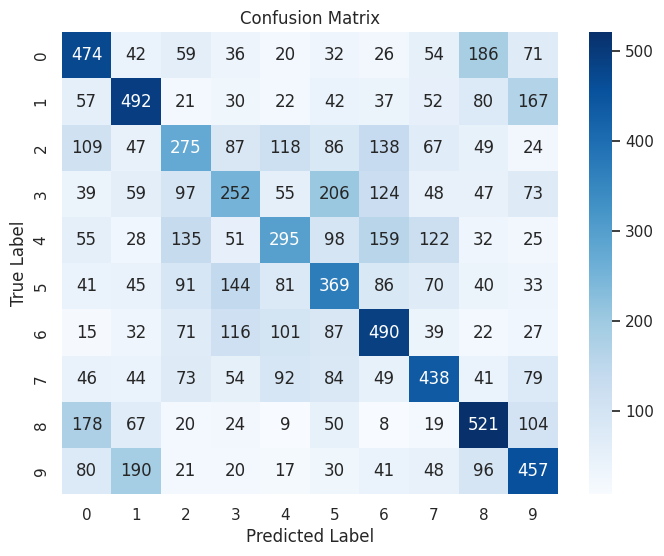

In [ ]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Flatten the input images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Create and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(x_train_flattened, y_train.ravel())

# Make predictions on the test set
gnb_pred = model.predict(x_test_flattened)

# Compute accuracy and error
accuracy_gaussian = accuracy_score(y_test, gnb_pred)
error_gaussian = 1 - accuracy_gaussian
print('Accuracy:', accuracy_gaussian)
print('Error:', error_gaussian)

Accuracy: 0.4063
Error: 0.5937


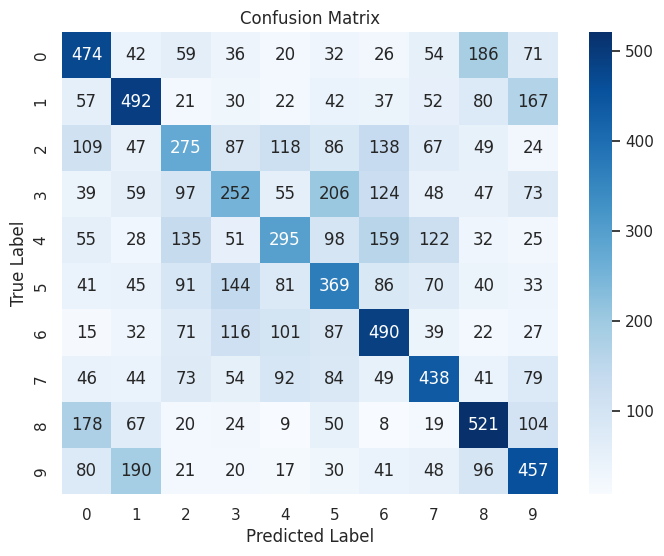

In [ ]:
# Compute the confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Flatten the input images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

#Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_flattened, y_train.ravel())

#Make predictions on the test set:
rf_pred = model.predict(x_test_flattened)

# Compute accuracy and error
accuracy_random_forest = accuracy_score(y_test, rf_pred)
error_random_forest = 1 - accuracy_random_forest
print('Accuracy:', accuracy_random_forest)
print('Error:', error_random_forest)

Accuracy: 0.4063
Error: 0.5937


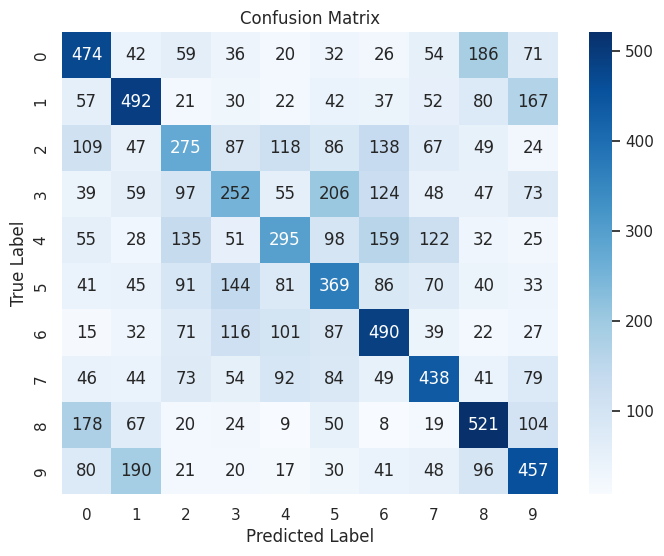

In [ ]:
# Compute confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

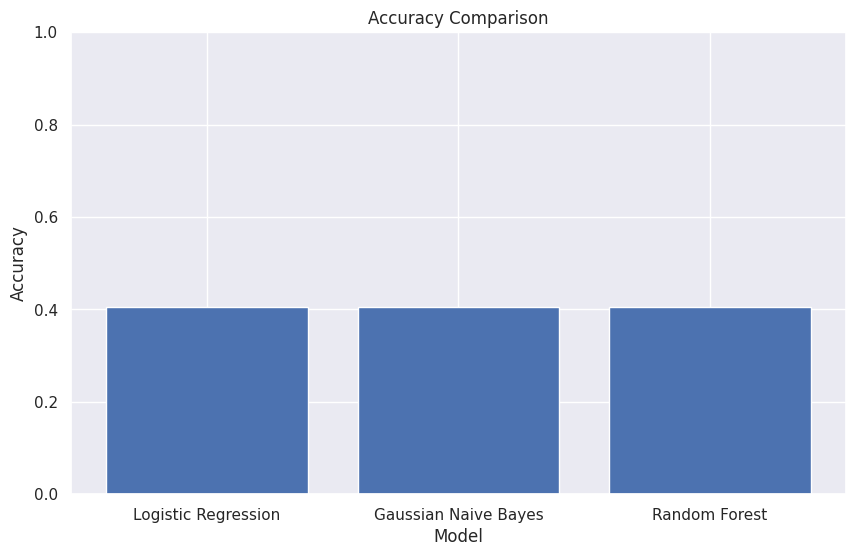

In [ ]:
accuracy_scores = [accuracy_logistic, accuracy_gaussian, accuracy_random_forest]
error_scores = [error_logistic, error_gaussian, error_random_forest]

# Define the models' names
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest']

# Plot the accuracy scores between the models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()